<a href="https://colab.research.google.com/github/donny95/py_d_on/blob/main/Bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - <br>1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals


https://www.kaggle.com/c/bike-sharing-demand

## import

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [2]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bike_sharing/train.csv", parse_dates=["datetime"])
print(train.shape)


test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bike_sharing/test.csv", parse_dates=["datetime"])
print(test.shape)

(10886, 12)
(6493, 9)


In [3]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


## 데이터 년도,월,일 컬럼 추가하기

In [6]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
print(train.shape)


(10886, 19)


In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


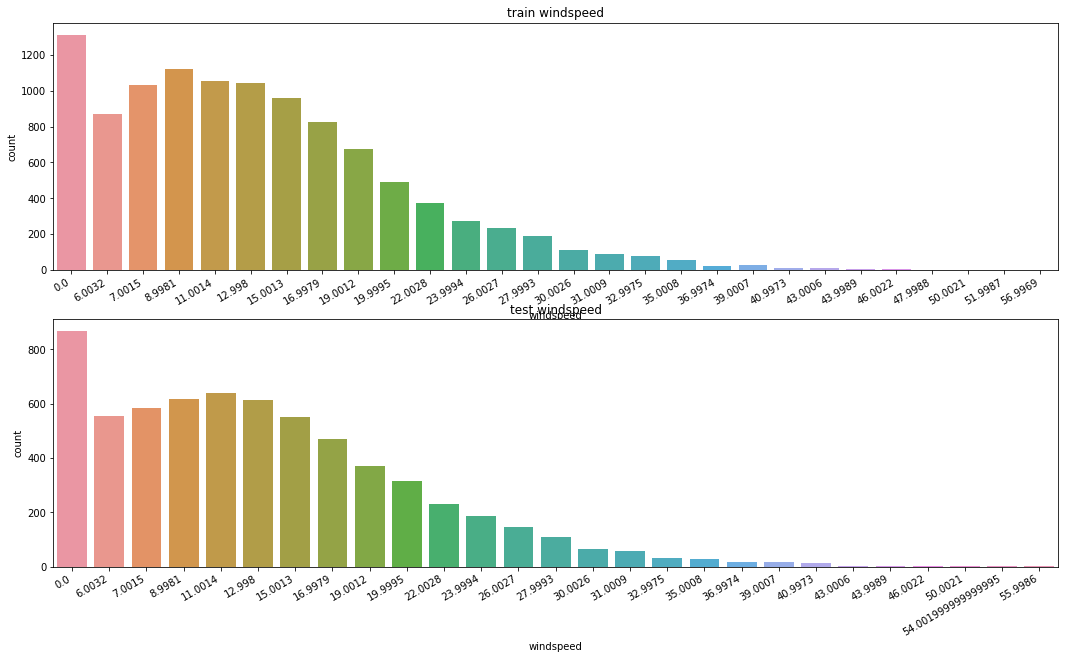

In [8]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1])

-  widspeed 풍속에 0 값이 가장 많다. => 잘못 기록된 데이터를 고쳐 줄 필요가 있음

- 풍속의 0값에 특정 값을 넣어준다.
- 평균을 구해 일괄적으로 넣어줄 수도 있지만, 예측의 정확도를 높이는 데 도움이 될것 같진 않다.
- train.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()
- test.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()

In [9]:
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


# 머신러닝을 통해 0값 예측해서 채우기

In [10]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    # 풍속이 0인것과 아닌 것을 나누어 준다.
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # 풍속을 예측할 피처를 선택한다.
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind0Values

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

## 그래프

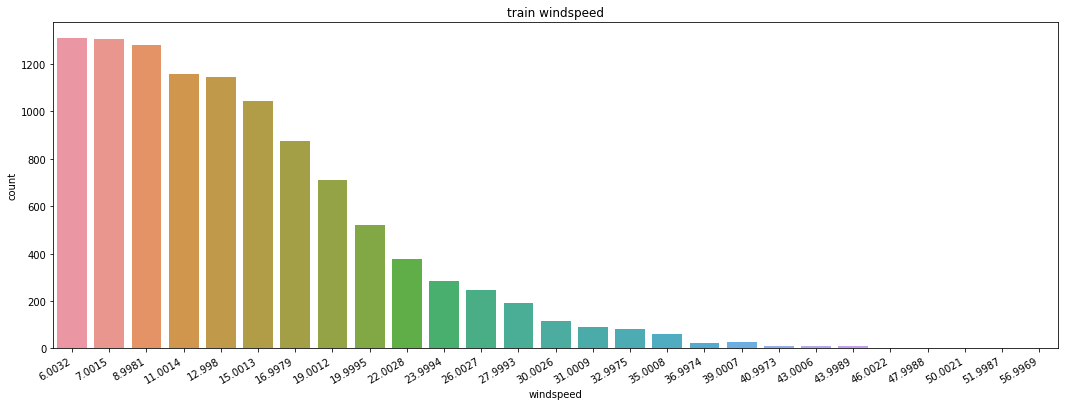

In [11]:
# 0값을 조정한다.
train = predict_windspeed(train)
# test = predict_windspeed(test)

# widspeed 의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=ax1)

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

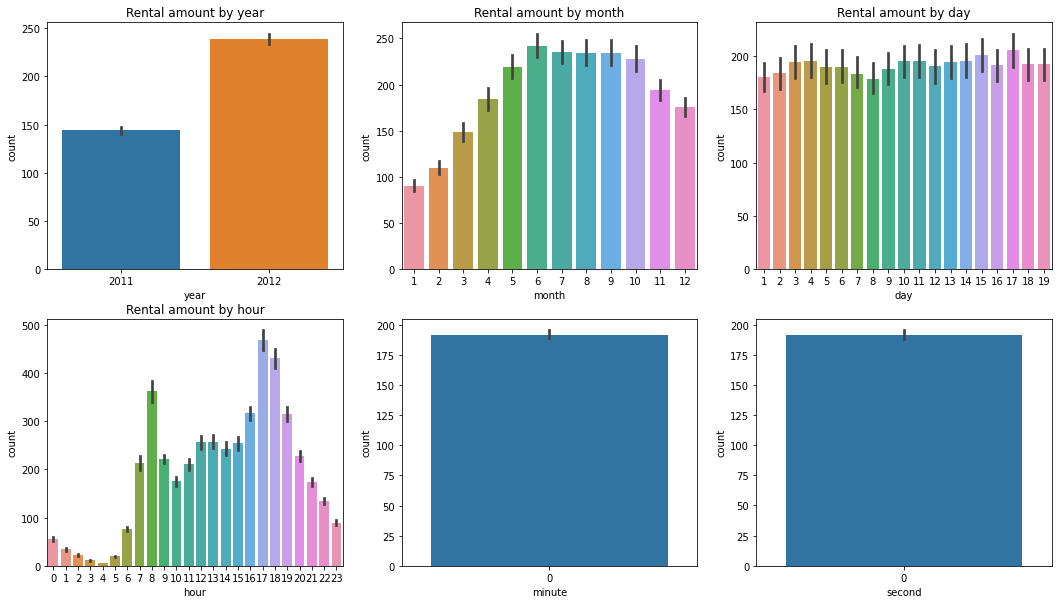

In [12]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3) 
figure.set_size_inches(18,10) 
sns.barplot(data=train, x = "year", y = "count", ax = ax1) 
sns.barplot(data=train, x = "month", y = "count", ax = ax2) 
sns.barplot(data=train, x = "day", y = "count", ax = ax3) 
sns.barplot(data=train, x = "hour", y = "count", ax = ax4) 
sns.barplot(data=train, x = "minute", y = "count", ax = ax5) 
sns.barplot(data=train, x = "second", y = "count", ax = ax6) 

ax1.set(ylabel = "count", title = "Rental amount by year") 
ax2.set(ylabel = "count", title = "Rental amount by month") 
ax3.set(ylabel = "count", title = "Rental amount by day") 
ax4.set(ylabel = "count", title = "Rental amount by hour")


- 연도별 대여량 :  11년도 사용량 <  12년도 사용량

- 월별 대여량 :  겨울 대여량 <  여름에 대여량

- 일별 대여량은 1~19일까지의 데이터만 포함됨. 나머지는 test데이터에 있음.

- 시간별 대여량 : 오전8시와 오후5시, 오후6시 가 높으며, 출퇴근시간에 이용하는 고객으로 추정

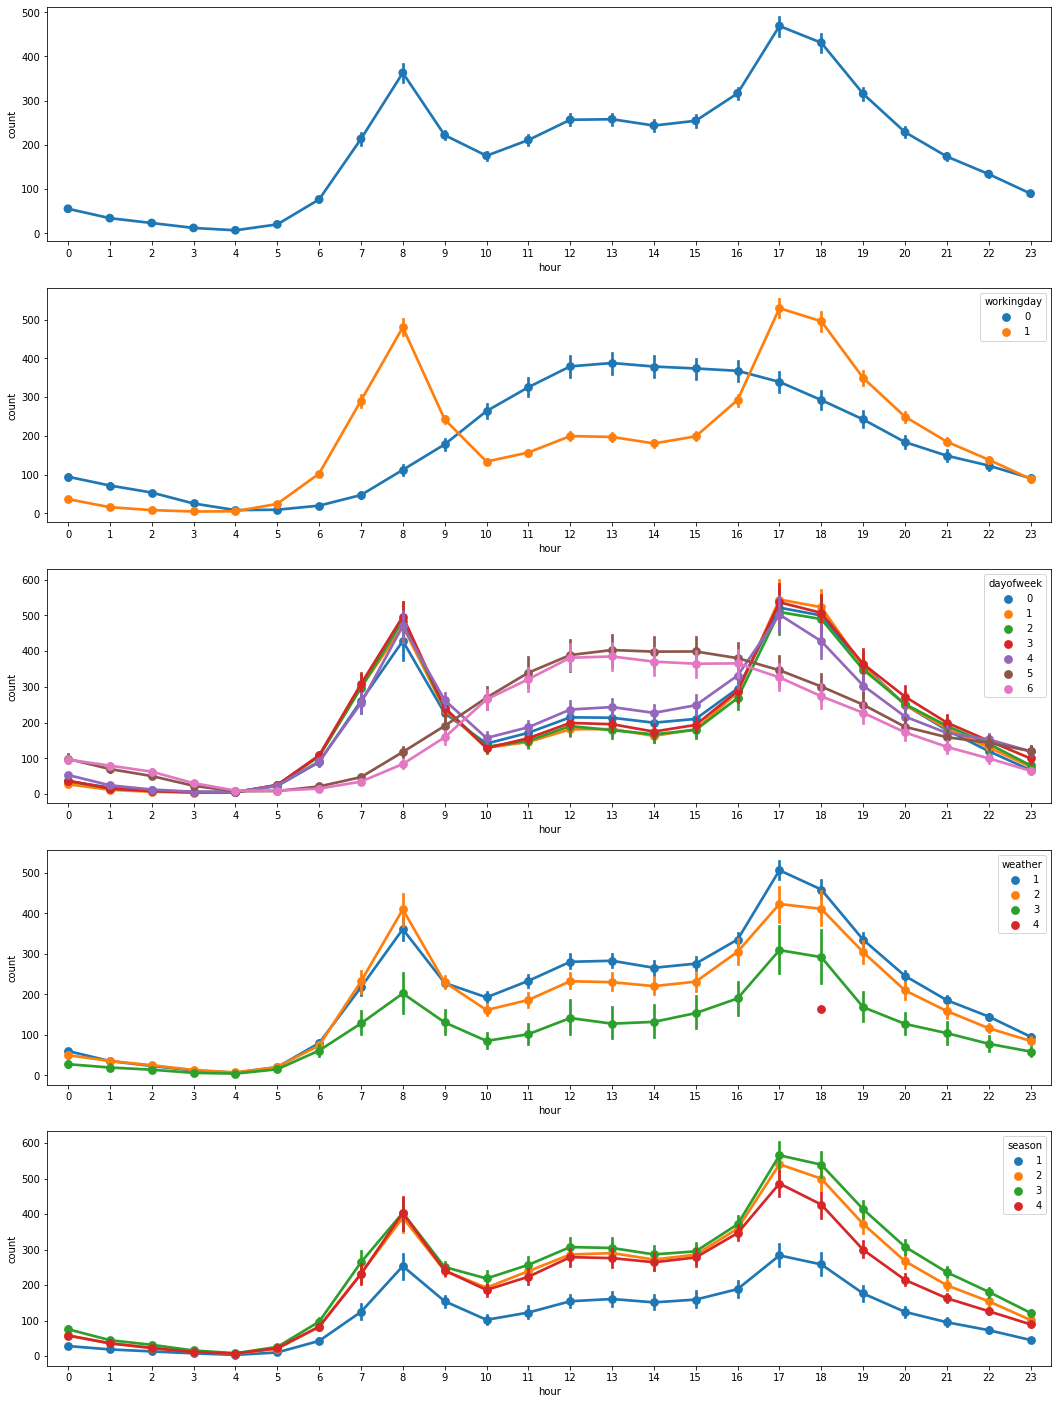

In [13]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5) 
fig.set_size_inches(18,25) 
sns.pointplot(data = train, x = "hour", y = "count", ax = ax1) 
sns.pointplot(data = train, x = "hour", y = "count", hue = "workingday", ax = ax2) 
sns.pointplot(data = train, x = "hour", y = "count", hue = "dayofweek", ax = ax3) 
sns.pointplot(data = train, x = "hour", y = "count", hue = "weather", ax = ax4) 
sns.pointplot(data = train, x = "hour", y = "count", hue = "season", ax = ax5)


## 수치형 데이터 상관분석

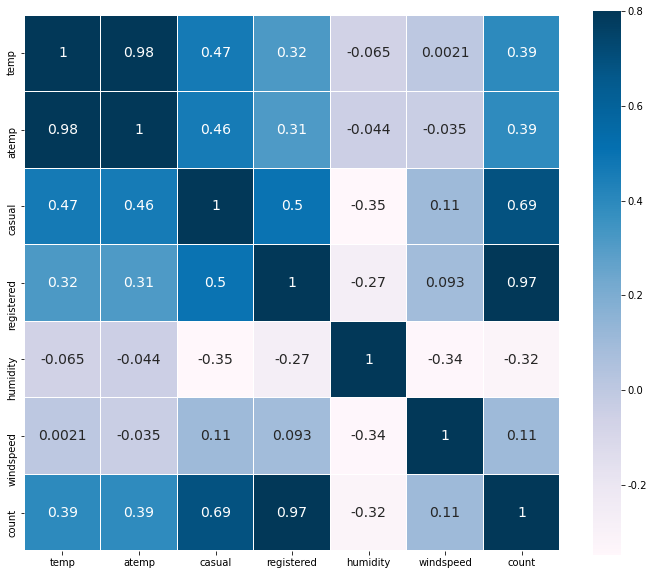

In [14]:
corr_data = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]] 
colormap = plt.cm.PuBu 
f , ax = plt.subplots(figsize = (12,10)) 
sns.heatmap(corr_data.corr(), vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap, linecolor="white",annot_kws = {'size':14})


- atemp  와 temp , count와 resistered 는 다중공선성이 있을것으로 추정

## Season - one hot *encoding*

In [15]:
# categorical_feature_names = ["season","holiday","workingday","weather",
#                              "dayofweek","month","year","hour"]

# for var in categorical_feature_names:
#     train[var] = train[var].astype("category")
#     test[var] = test[var].astype("category")

In [16]:
pd.get_dummies(train, columns=['season'])
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [17]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dayofweek     0
dtype: int64

## outlier 탐지

In [18]:
from collections import Counter
def detect_outliers(df, n, features):
    outlier_idx_list = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        IQR15 = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - IQR15) | (df[col] > Q3 + IQR15)].index
        outlier_idx_list.extend(outlier_list_col)
    outlier_idx_list = Counter(outlier_idx_list)
    multiple_outliers = list(k for k, v in outlier_idx_list.items() if v > n)
    
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

In [19]:
train.loc[outliers_to_drop]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
5856,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,0,2
5956,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012,3,19,18,0,0,0
6001,2012-04-02 17:00:00,2,0,1,1,20.50,24.240,29,19.0012,128,601,729,2012,4,2,17,0,0,0
6020,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757,2012,4,3,17,0,0,1
6021,2012-04-03 18:00:00,2,0,1,1,24.60,30.305,26,11.0014,139,661,800,2012,4,3,18,0,0,1
6058,2012-04-05 17:00:00,2,0,1,1,20.50,24.240,31,11.0014,145,677,822,2012,4,5,17,0,0,3
6242,2012-04-13 17:00:00,2,0,1,1,22.96,26.515,24,11.0014,117,621,738,2012,4,13,17,0,0,4
6738,2012-05-17 17:00:00,2,0,1,1,27.06,31.060,31,8.9981,133,719,852,2012,5,17,17,0,0,3
6739,2012-05-17 18:00:00,2,0,1,1,27.06,31.060,27,11.0014,134,734,868,2012,5,17,18,0,0,3
6761,2012-05-18 17:00:00,2,0,1,1,27.06,31.060,34,8.9981,124,688,812,2012,5,18,17,0,0,4


In [20]:
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop=True) 
train.shape

(10848, 19)

## 왜도 첨도 확인하기

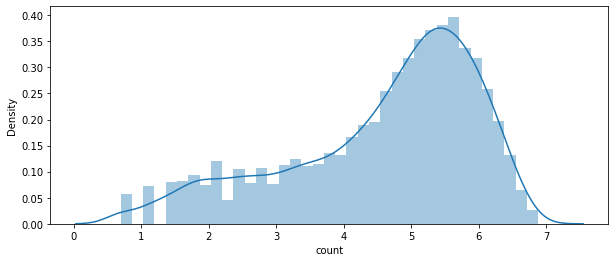

In [21]:
train['count'] = np.log1p(train['count'])

f, axes = plt.subplots(figsize=(10, 4))
sns.distplot(train['count'])
plt.show()

#log로 변환

In [22]:
train["count"] = train["count"].map(lambda i:np.log(i) if i>0 else 0)

## train, test 분할하기

In [23]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [24]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

# time data 삭제하기
datetime_test = test['datetime'] 
train.drop(["datetime", "registered","casual","holiday", "minute", "second"], axis = 1, inplace = True) 
test.drop(["datetime"], axis = 1, inplace = True)

X_train = train.drop("count", axis = 1)
y_train = train["count"]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2000)


In [26]:
X_train

,season,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
7586,3,1,1,32.80,37.120,52,11.0014,2012,8,1,13,2
6001,2,1,1,18.86,22.725,31,11.0014,2012,4,2,20,0
4764,1,0,1,12.30,13.635,36,27.9993,2012,1,2,14,0
980,1,1,3,17.22,21.210,0,15.0013,2011,3,10,12,3
9290,4,0,2,14.76,18.180,93,7.0015,2012,12,8,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4380,4,1,1,13.12,15.150,53,19.9995,2011,12,1,10,3
10212,4,1,1,10.66,15.150,70,6.0032,2011,12,13,23,1
1590,2,1,1,22.96,26.515,37,19.0012,2011,4,18,21,0
4045,4,1,1,18.86,22.725,63,8.9981,2011,11,3,18,3


## 학습모델 선정

In [27]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
# ---- 개별 분류 모델 -------------------
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

for model_name, model in [("LR", lr), ("Ridge", ridge), ("Lasso", lasso)]:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    print(model_name,':' , mean_squared_error(y_val, pred)) # rmse 표준편차와 동일...?;;;;;;;;;

LR : 0.10949588192966458
Ridge : 0.10949580431079763
Lasso : 0.1453772149111704


In [29]:
from sklearn.model_selection import GridSearchCV

myprm = {'alpha':[0.5,1.0,3.0,10.0, 20.0,25.0,30,40]}
best_model = GridSearchCV(ridge, param_grid=myprm,
             scoring="neg_mean_squared_error",verbose=0,
             refit=True, cv=5)
best_model.fit(X_train, y_train)
print("베스트 점수:",best_model.best_score_)
print("베스트 파라미터:",best_model.best_params_)

best_pred = best_model.predict(X_val)

베스트 점수: -0.1023612536845876
베스트 파라미터: {'alpha': 40}


In [30]:
print("submit시 제출할 예측값 :\n", best_pred[:5])

submit시 제출할 예측값 :
 [1.7380941  1.65681906 1.8235926  1.03021307 1.15822027]
